# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### jay notes - assignments to look at
* api day 2, #5 airport_ratings

In [193]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
# city_name = "rikitea"
# base_url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}&units=imperial"
# # city_name = "boise"
# # query_url = base_url.format(city_name, weather_api_key)
# articles = requests.get(base_url).json()
# articles

In [47]:
# Create a skeleton dataframe with the cities list. 
# Add columns for: City, Lat, Lng, Max, Temp, Humidity, Cloudiness, Wind, Speed, Country, Date
# Create a dataframe with the Cities list adn then append that datafame with new empty columns desired

df = pd.DataFrame(cities)
df["Latitude"] = ""
df["Longitude"] = ""
df["Max Temp (F)"] = ""
df["Humidity"] = ""
df["Cloud Coverage"] = ""
df["Wind Speed"] = ""
df["Country"] = ""
df["Datetime"] = ""

# rename the column name '0' as 'City'
df.rename(columns={0 : 'City'}, inplace=True)
df

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloud Coverage,Wind Speed,Country,Datetime
0,rikitea,,,,,,,,
1,tuktoyaktuk,,,,,,,,
2,busselton,,,,,,,,
3,mataura,,,,,,,,
4,namibe,,,,,,,,
...,...,...,...,...,...,...,...,...,...
641,kokkola,,,,,,,,
642,mayumba,,,,,,,,
643,lanzhou,,,,,,,,
644,nicoya,,,,,,,,


In [48]:
# use the following site to pull the calls https://openweathermap.org/current
# api call url - api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
# create a shell df with columns for City Lat Lng Max Temp Humidity Cloudiness Wind Speed Country Date
# option1 - create shell lists for each of the columns then combine then below into a df
# option2 - figure out how to populate dataframe with the for loop method using .iterrows() 
city_num = 1

print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

# Using option 2 - I wanted to test using .iterrows() to populate the data frame skeleton I created above
for index, row in df.iterrows():
    base_url = f"https://api.openweathermap.org/data/2.5/weather?q={row['City']}&appid={weather_api_key}&units=imperial"
    query_data = requests.get(base_url).json()
    
    try:
        print(f"Processing record {city_num} out of {len(cities)} | {row['City']} | {query_data['main']['temp']}")
        
        df.loc[index, 'Latitude'] = query_data['coord']['lat']
        df.loc[index, 'Longitude'] = query_data['coord']['lon']
        df.loc[index, 'Max Temp (F)'] = query_data['main']['temp_max']
        df.loc[index, 'Humidity'] = query_data['main']['humidity']
        df.loc[index, 'Cloud Coverage'] = query_data['clouds']['all']
        df.loc[index, 'Wind Speed'] = query_data['wind']['speed']
        df.loc[index, 'Country'] = query_data['sys']['country']
        df.loc[index, 'Datetime'] = query_data['dt']
        
        city_num += 1     
    except:
        print("City not found.")
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')   


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 1 out of 646 | rikitea | 71.2
Processing record 2 out of 646 | tuktoyaktuk | 57.2
Processing record 3 out of 646 | busselton | 54.91
Processing record 4 out of 646 | mataura | 42.94
Processing record 5 out of 646 | namibe | 62.65
Processing record 6 out of 646 | albany | 77.95
Processing record 7 out of 646 | anloga | 75.2
City not found.
Processing record 8 out of 646 | qaanaaq | 45.05
Processing record 9 out of 646 | ushuaia | 35.6
Processing record 10 out of 646 | bluff | 47.05
Processing record 11 out of 646 | barrow | 39.2
City not found.
City not found.
Processing record 12 out of 646 | kaabong | 62.35
Processing record 13 out of 646 | port alfred | 58.23
Processing record 14 out of 646 | parrita | 70.09
Processing record 15 out of 646 | kudahuvadhoo | 84.11
City not found.
Processing record 16 out of 646 | bathsheba | 82.4
Processing record 17 out of 646 | irtyshskiy | 65.73
P

Processing record 155 out of 646 | krusevac | 57.87
Processing record 156 out of 646 | mount gambier | 48.2
City not found.
Processing record 157 out of 646 | mahebourg | 69.8
Processing record 158 out of 646 | pringsewu | 79.36
Processing record 159 out of 646 | east london | 58.8
Processing record 160 out of 646 | sakakah | 87.8
Processing record 161 out of 646 | chioggia | 69.26
Processing record 162 out of 646 | djambala | 69.22
Processing record 163 out of 646 | cabra | 77
Processing record 164 out of 646 | port hawkesbury | 68.67
Processing record 165 out of 646 | opuwo | 50.11
Processing record 166 out of 646 | aripuana | 78.04
Processing record 167 out of 646 | san quintin | 76.23
Processing record 168 out of 646 | ambulu | 74.8
Processing record 169 out of 646 | coria | 80.01
Processing record 170 out of 646 | puerto colombia | 80.6
Processing record 171 out of 646 | agboville | 70.5
Processing record 172 out of 646 | port macquarie | 57.99
City not found.
Processing record 17

Processing record 308 out of 646 | springbok | 43.25
Processing record 309 out of 646 | beringovskiy | 51.19
Processing record 310 out of 646 | egvekinot | 57.85
Processing record 311 out of 646 | geraldton | 53.6
Processing record 312 out of 646 | hendala | 78.8
City not found.
City not found.
City not found.
Processing record 313 out of 646 | vilyuysk | 70.32
Processing record 314 out of 646 | yerbogachen | 66.24
Processing record 315 out of 646 | totskoye | 72.16
Processing record 316 out of 646 | haines junction | 62.85
Processing record 317 out of 646 | siderno | 77
Processing record 318 out of 646 | dzaoudzi | 77
Processing record 319 out of 646 | bucksport | 73.18
Processing record 320 out of 646 | daru | 78.58
Processing record 321 out of 646 | vukovar | 53.6
Processing record 322 out of 646 | thomasville | 80.42
Processing record 323 out of 646 | karimganj | 76.77
Processing record 324 out of 646 | ketchikan | 59.7
Processing record 325 out of 646 | balabac | 84.11
Processing 

Processing record 461 out of 646 | praya | 78.8
Processing record 462 out of 646 | isiro | 66.15
Processing record 463 out of 646 | verkhnevilyuysk | 68
Processing record 464 out of 646 | te anau | 40.75
Processing record 465 out of 646 | kipini | 77.59
Processing record 466 out of 646 | krasnogorodsk | 48.38
City not found.
Processing record 467 out of 646 | biscarrosse | 68
Processing record 468 out of 646 | samarinda | 74.59
Processing record 469 out of 646 | dilla | 60.57
Processing record 470 out of 646 | cape coast | 74.1
Processing record 471 out of 646 | murray | 93.34
Processing record 472 out of 646 | hovd | 62.6
Processing record 473 out of 646 | lola | 69.39
Processing record 474 out of 646 | migori | 60.57
Processing record 475 out of 646 | mildura | 49.08
Processing record 476 out of 646 | abalak | 64.36
Processing record 477 out of 646 | awjilah | 74.86
Processing record 478 out of 646 | ceres | 102.76
City not found.
Processing record 479 out of 646 | fort walton beach 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [195]:
# Need to clean the data of the empty cells, it messes up calculations later on if you don't because you can't use a bool on a string (the empty cells)
df['Humidity'] = df['Humidity'].replace('', np.nan)
city_df = df.dropna()
city_df.shape
# df.shape

(586, 9)

In [196]:
# Display the cities weather dataframe pulled from the live API data
city_df.head(50)

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloud Coverage,Wind Speed,Country,Datetime
0,rikitea,-23.12,-134.97,71.2,73.0,90,14.18,PF,1594600230
1,tuktoyaktuk,69.45,-133.04,57.2,62.0,75,10.29,CA,1594600231
2,busselton,-33.65,115.33,55.99,99.0,44,3,AU,1594600200
3,mataura,-46.19,168.86,42.94,86.0,86,3.98,NZ,1594600189
4,namibe,-15.2,12.15,62.65,75.0,0,7.94,AO,1594600045
5,albany,42.6,-73.97,82.99,52.0,10,1.99,US,1594600201
6,anloga,5.79,0.9,75.2,88.0,20,6.93,GH,1594600045
8,qaanaaq,77.48,-69.36,45.05,65.0,97,2.33,GL,1594600233
9,ushuaia,-54.8,-68.3,35.6,80.0,40,18.34,AR,1594600233
10,bluff,-46.6,168.33,47.05,68.0,91,10.38,NZ,1594600181


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [197]:
# Created a new dataframe variable called clean_city_df pulling the Humidity over 100 with a boolean
# Used .reset_index() to reset the index numbers and used parameter drop=true so no new column is made
clean_city_df = city_df[(city_df["Humidity"] <= 100)]
clean_city_df = clean_city_df.reset_index(drop=True)
clean_city_df

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloud Coverage,Wind Speed,Country,Datetime
0,rikitea,-23.12,-134.97,71.2,73.0,90,14.18,PF,1594600230
1,tuktoyaktuk,69.45,-133.04,57.2,62.0,75,10.29,CA,1594600231
2,busselton,-33.65,115.33,55.99,99.0,44,3,AU,1594600200
3,mataura,-46.19,168.86,42.94,86.0,86,3.98,NZ,1594600189
4,namibe,-15.2,12.15,62.65,75.0,0,7.94,AO,1594600045
...,...,...,...,...,...,...,...,...,...
581,kokkola,63.84,23.13,54,100.0,90,3.36,FI,1594600437
582,mayumba,-3.43,10.66,71.56,88.0,100,3.89,GA,1594600437
583,lanzhou,36.06,103.79,72,62.0,100,2.24,CN,1594600438
584,nicoya,10.15,-85.45,80.6,78.0,100,4.7,CR,1594600203


In [198]:
# Export the City_Data into a csv
# exported data to current folder using .to_csv() with parameter index=False so that index isn't written into csv (default is True)
clean_city_df.to_csv('weather_raw_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

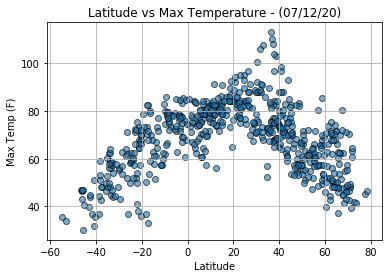

In [199]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Max Temp' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Max Temp (F)'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Max Temperature - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()

## Latitude vs. Humidity Plot

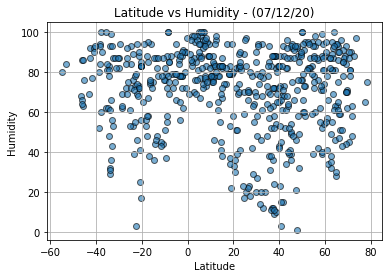

In [200]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Humidity' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Humidity'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Humidity - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

## Latitude vs. Cloudiness Plot

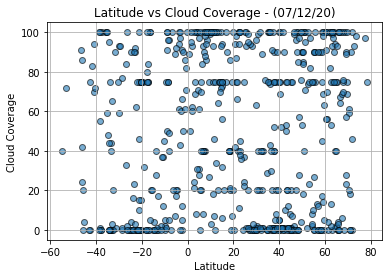

In [201]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Cloud Coverage' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Cloud Coverage'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Cloud Coverage - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")
plt.grid()

## Latitude vs. Wind Speed Plot

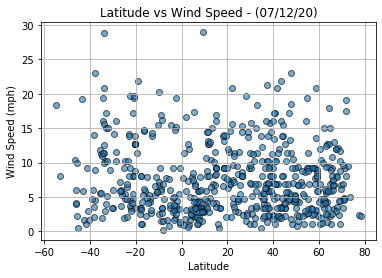

In [202]:
# Plotting using plt.scatter() with several parameters that include: "alpha=" and "edgecolor="
# Format using the current date as of the analysis using Time Module time.strftime('%D') for date
# The x values are from the dataframe 'Latitude' series, and the y values are from the 'Cloud Coverage' series
plt.scatter(clean_city_df['Latitude'], clean_city_df['Wind Speed'], 
            alpha=.6, edgecolor='black')
plt.title(f"Latitude vs Wind Speed - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

## Linear Regression

The R-squared value is 0.0050663831754371395


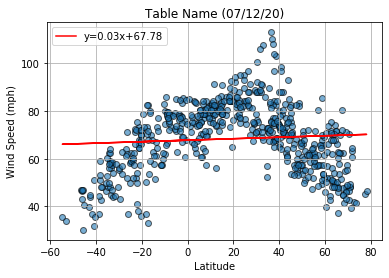

In [250]:
# OPTIONAL: Create a function to create Linear Regression plots
def regress_func(x_axis, y_axis, xlabel, ylabel, table_name):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
    line = slope*x_axis+intercept
    plt.scatter(x_axis, y_axis, alpha=.6, edgecolor='black')
    plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(table_name)
    plt.legend()
    plt.grid()
    print(f"The R-squared value is {rvalue*rvalue}")
    
regress_func(clean_city_df['Latitude'].astype(float), clean_city_df['Max Temp (F)'].astype(float), "Latitude",
             "Wind Speed (mph)", f"Table Name ({time.strftime('%D')})")

In [236]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = (clean_city_df.loc[clean_city_df['Latitude'] > 0])
southern_df = (clean_city_df.loc[clean_city_df['Latitude'] <= 0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared value is 0.367369029939214


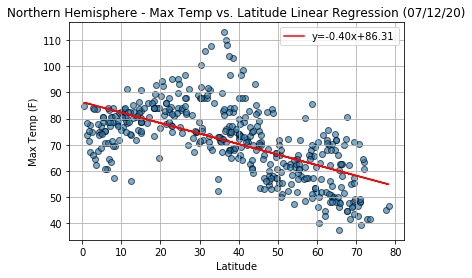

In [243]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Max Temp (F)'].astype(float), "Latitude",
             "Max Temp (F)", f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%D')})")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared value is 0.5786113499348808


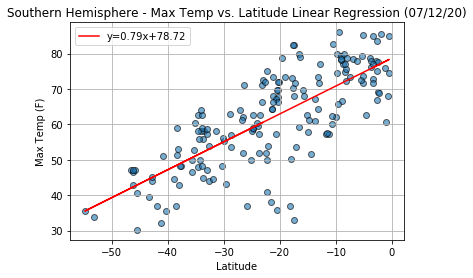

In [245]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Max Temp (F)'].astype(float), "Latitude",
             "Max Temp (F)", f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%D')})")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared value is 0.0084897865523265


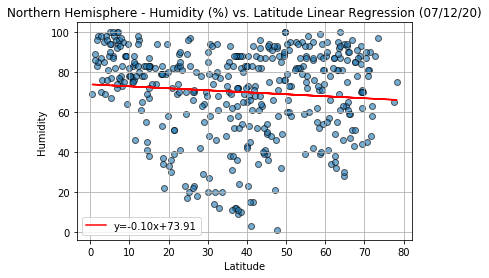

In [246]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Humidity'].astype(float), "Latitude",
             "Humidity", f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%D')})")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared value is 0.00021277309032487478


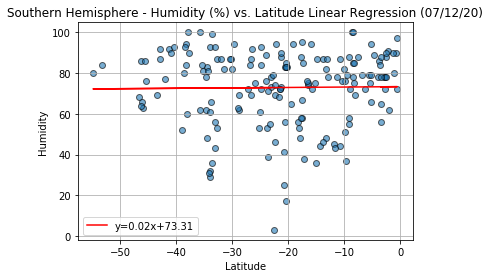

In [252]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Humidity'].astype(float), "Latitude",
             "Humidity", f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%D')})")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared value is 0.006962892130396812


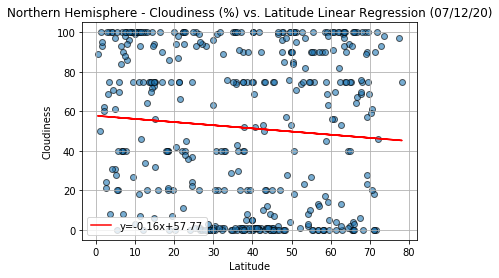

In [255]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Cloud Coverage'].astype(float), "Latitude",
             "Cloudiness", f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%D')})")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared value is 0.004179026795836195


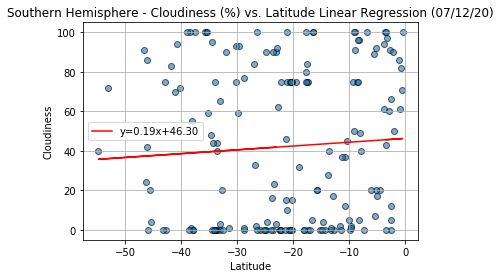

In [256]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Cloud Coverage'].astype(float), "Latitude",
             "Cloudiness", f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%D')})")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared value is 0.00035742354161700997


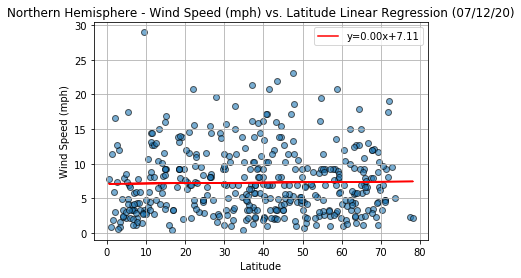

In [258]:
regress_func(northern_df['Latitude'].astype(float), northern_df['Wind Speed'].astype(float), "Latitude",
             "Wind Speed (mph)", f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({time.strftime('%D')})")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared value is 0.03294515203606486


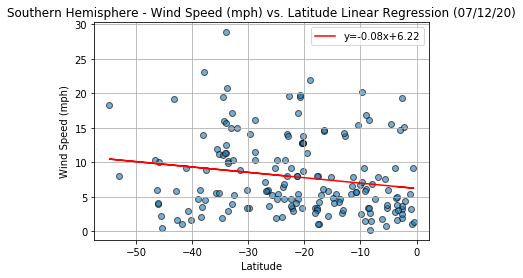

In [259]:
regress_func(southern_df['Latitude'].astype(float), southern_df['Wind Speed'].astype(float), "Latitude",
             "Wind Speed (mph)", f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({time.strftime('%D')})")